In [1]:
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
import numpy as np
import time, random
from tqdm import tqdm
%matplotlib inline
import warnings
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
def calc_inter_intra(values,labels):
    tot_var = values.var()
    uniq_lab = list(set(labels))
    intra_var = sum([values[labels==n].var()*sum(labels==n)/(len(labels)) for n in uniq_lab])
    inter_var = tot_var - intra_var
    return inter_var/tot_var

In [3]:
table =pd.read_csv('player_data.csv')

In [4]:
unmod = pd.read_csv('player_data_transform.csv',index_col='Unnamed: 0')

In [5]:
unmod.drop('FGM',axis =1)

,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,TOV,STL,BLK,BLKA,PF,PFD,PLUS_MINUS,POSITION
1,0.268041,0.077320,0.216495,0.036082,0.046392,0.030928,0.159794,0.041237,0.046392,0.025773,0.020619,0.010309,0.108247,0.061856,-0.041237,SF
2,0.287462,0.000000,0.000000,0.064220,0.116208,0.155963,0.122324,0.036697,0.051988,0.036697,0.030581,0.018349,0.085627,0.113150,0.128440,C
3,0.247475,0.000000,0.005051,0.095960,0.131313,0.085859,0.191919,0.075758,0.050505,0.025253,0.030303,0.020202,0.101010,0.126263,-0.025253,C
4,0.304348,0.000000,0.000000,0.043478,0.130435,0.043478,0.260870,0.043478,0.000000,0.043478,0.000000,0.000000,0.217391,0.043478,-0.043478,C
5,0.538922,0.011976,0.035928,0.134731,0.158683,0.098802,0.155689,0.059880,0.044910,0.017964,0.035928,0.017964,0.062874,0.137725,0.110778,PF
6,0.275000,0.005000,0.010000,0.080000,0.100000,0.100000,0.170000,0.035000,0.055000,0.020000,0.060000,0.025000,0.100000,0.075000,-0.095000,C
7,0.280000,0.060000,0.163333,0.030000,0.040000,0.046667,0.206667,0.040000,0.036667,0.036667,0.020000,0.006667,0.066667,0.040000,0.106667,PF
9,0.220974,0.011236,0.029963,0.052434,0.074906,0.041199,0.157303,0.101124,0.048689,0.059925,0.029963,0.014981,0.056180,0.059925,0.071161,SF
10,0.279693,0.076628,0.195402,0.042146,0.053640,0.053640,0.137931,0.034483,0.022989,0.015326,0.011494,0.007663,0.072797,0.049808,0.145594,PF
11,0.296296,0.000000,0.000000,0.185185,0.185185,0.185185,0.148148,0.000000,0.074074,0.037037,0.111111,0.074074,0.037037,0.111111,-0.481481,C


In [6]:
'Daniel Hamilton', 'Zaza Pachulia', ''

('Daniel Hamilton', 'Zaza Pachulia', '')

In [7]:
table.iloc[322]

PERSON_ID     2585.000
MIN             14.100
FGM              2.200
FGA              3.800
FG_PCT           0.567
FG3M             0.000
FG3A             0.000
FG3_PCT          0.000
FTM              1.100
FTA              1.300
FT_PCT           0.806
OREB             1.300
DREB             3.400
REB              4.700
AST              1.600
TOV              1.100
STL              0.600
BLK              0.200
BLKA             0.500
PF               1.800
PFD              1.400
PTS              5.400
PLUS_MINUS       2.800
Name: 322, dtype: float64

In [8]:
unmod.iloc[109]

FGM            0.131579
FGA            0.298246
FG3M          0.0219298
FG3A          0.0570175
FTM           0.0526316
FTA           0.0701754
OREB          0.0570175
DREB           0.131579
AST           0.0438596
TOV           0.0526316
STL           0.0219298
BLK           0.0307018
BLKA          0.0219298
PF             0.127193
PFD           0.0570175
PLUS_MINUS    -0.157895
POSITION             PF
Name: 198, dtype: object

In [9]:
player_data = pd.read_csv("player_data_transform.csv")
player_data = player_data.drop('Unnamed: 0',axis=1)
X = player_data.drop('POSITION',axis = 1)
y = player_data.POSITION

In [10]:
norm_X=(X-X.mean())/X.std()
tsne = TSNE(perplexity=20,learning_rate = 10)
X_2d_t = tsne.fit_transform(X)

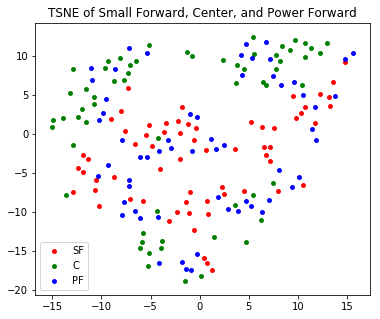

In [11]:
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k'
fash_labels = y.unique()
names = fash_labels
for i, c, label in zip(fash_labels, colors, names):
    plt.scatter(X_2d_t[y == i, 0], X_2d_t[y == i, 1], c=c,s=15, label=label)
plt.legend(markerscale=1)
plt.title('TSNE of Small Forward, Center, and Power Forward');

Intra_class/Inter_class Variance 0.434277604118


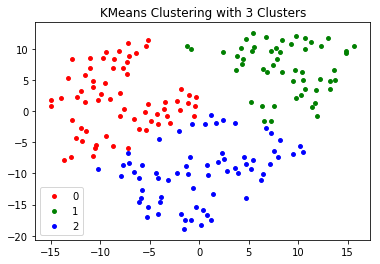

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_2d_t)
colors = 'r','g','b','c','m'
fash_labels = list(set(kmeans.labels_))
names = fash_labels
for i, c, label in zip(fash_labels, colors, names):
    plt.scatter(X_2d_t[kmeans.labels_ == i, 0], X_2d_t[kmeans.labels_ == i, 1], c=c,s=15, label=label)
plt.legend(markerscale=1)
print ("Intra_class/Inter_class Variance",calc_inter_intra(X_2d_t,kmeans.labels_))
plt.title("KMeans Clustering with 3 Clusters");

In [13]:
import sklearn.cluster as SKC

Intra_class/Inter_class Variance 0.370544685283


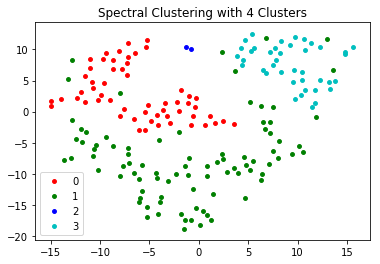

In [14]:
spectral = SKC.SpectralClustering(n_clusters = 4).fit(X_2d_t)
colors = 'r','g','b','c','m'
fash_labels = list(set(spectral.labels_))
names = fash_labels
for i, c, label in zip(fash_labels, colors, names):
    plt.scatter(X_2d_t[spectral.labels_ == i, 0], X_2d_t[spectral.labels_ == i, 1], c=c,s=15, label=label)
plt.legend(markerscale=1)
print ("Intra_class/Inter_class Variance",calc_inter_intra(X_2d_t,spectral.labels_))
plt.title("Spectral Clustering with 4 Clusters");

Intra_class/Inter_class Variance 0.385980370225


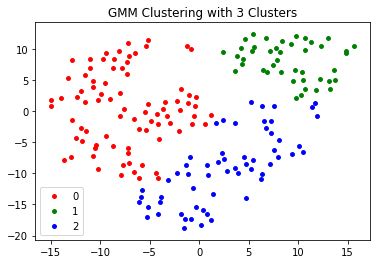

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3).fit(X_2d_t)
colors = 'r','g','b','c','m'
labels = gmm.predict(X_2d_t)
fash_labels = set(labels)
names = fash_labels
for i, c, label in zip(fash_labels, colors, names):
    plt.scatter(X_2d_t[labels == i, 0], X_2d_t[labels == i, 1], c=c,s=15, label=label)
plt.legend(markerscale=1)
print ("Intra_class/Inter_class Variance",calc_inter_intra(X_2d_t,labels))
plt.title("GMM Clustering with 3 Clusters");

In [18]:
player_data['kmeans'] = kmeans.labels_

In [19]:
player_data['spectarl'] = spectral.labels_
player_data['GMM'] = labels

In [28]:
player_data[player_data.kmeans == 0].FGA.mean()

0.269484940671397

In [50]:
player_data.groupby(player_data.kmeans).mean()

,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,TOV,STL,BLK,BLKA,PF,PFD,PLUS_MINUS,spectarl,GMM
kmeans,,,,,,,,,,,,,,,,,,
0,0.130228,0.269485,0.023075,0.069619,0.048777,0.070670,0.058993,0.164659,0.063088,0.044442,0.036097,0.028197,0.016488,0.106904,0.068111,0.075450,0.242424,0.000000
1,0.137950,0.278375,0.019179,0.057459,0.051151,0.073784,0.069674,0.162281,0.055731,0.054756,0.026841,0.027757,0.017918,0.100597,0.070343,-0.233102,2.547170,1.113208
2,0.192744,0.413799,0.049066,0.134404,0.088722,0.113832,0.047482,0.179666,0.077187,0.058445,0.027241,0.026695,0.021539,0.081455,0.099488,0.016049,0.909091,1.545455


In [34]:
player_data.groupby(player_data.GMM).mean()

,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,TOV,STL,BLK,BLKA,PF,PFD,PLUS_MINUS,kmeans,spectarl
GMM,,,,,,,,,,,,,,,,,,
0,0.135969,0.284156,0.029461,0.084535,0.051664,0.073426,0.057135,0.166453,0.063648,0.045559,0.033956,0.027896,0.016112,0.103383,0.069589,0.075068,0.385542,0.385542
1,0.132559,0.264542,0.015399,0.046167,0.049911,0.071633,0.073700,0.163616,0.051230,0.052342,0.026332,0.028866,0.017864,0.098846,0.068456,-0.254704,1.000000,2.767442
2,0.197323,0.421871,0.045261,0.127274,0.090705,0.117171,0.047607,0.177547,0.080105,0.062043,0.028004,0.026057,0.022950,0.083596,0.102884,-0.027014,1.864407,1.016949


In [35]:
player_data.groupby(player_data.spectarl).mean()

,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,TOV,STL,BLK,BLKA,PF,PFD,PLUS_MINUS,kmeans,GMM
spectarl,,,,,,,,,,,,,,,,,,
0,0.131628,0.268461,0.024290,0.069136,0.052297,0.076371,0.064123,0.167199,0.060843,0.047232,0.030368,0.028044,0.017338,0.108042,0.073019,0.024087,0.214286,0.107143
1,0.180453,0.387542,0.042123,0.119614,0.079273,0.101973,0.047786,0.170968,0.076178,0.055282,0.031534,0.027391,0.021031,0.085522,0.090092,0.031386,1.505747,1.298851
2,0.165211,0.286703,0.000000,0.001484,0.084089,0.140747,0.143922,0.334737,0.068320,0.067147,0.030192,0.038025,0.018219,0.088748,0.124116,-0.037370,1.000000,0.000000
3,0.130662,0.263183,0.018822,0.055746,0.044809,0.066445,0.067099,0.160488,0.051013,0.052596,0.027459,0.026611,0.015561,0.102377,0.065361,-0.258006,1.000000,1.050000


In [59]:
end = player_data.groupby(player_data.GMM).mean()

In [66]:
end.T

GMM,0,1,2
FGM,0.135969,0.132559,0.197323
FGA,0.284156,0.264542,0.421871
FG3M,0.029461,0.015399,0.045261
FG3A,0.084535,0.046167,0.127274
FTM,0.051664,0.049911,0.090705
FTA,0.073426,0.071633,0.117171
OREB,0.057135,0.073700,0.047607
DREB,0.166453,0.163616,0.177547
AST,0.063648,0.051230,0.080105
TOV,0.045559,0.052342,0.062043
